# Fashion MNIST - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Fashion MNIST Data_Set Load & Review

> ## 1) Load Fashion MNIST Data_Set

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


* Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[9 0 0 3 0]


In [12]:
y_train.shape

(60000, 10)

* Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[9 2 1 1 6]


> ## 2) Visualization

* matplotlib

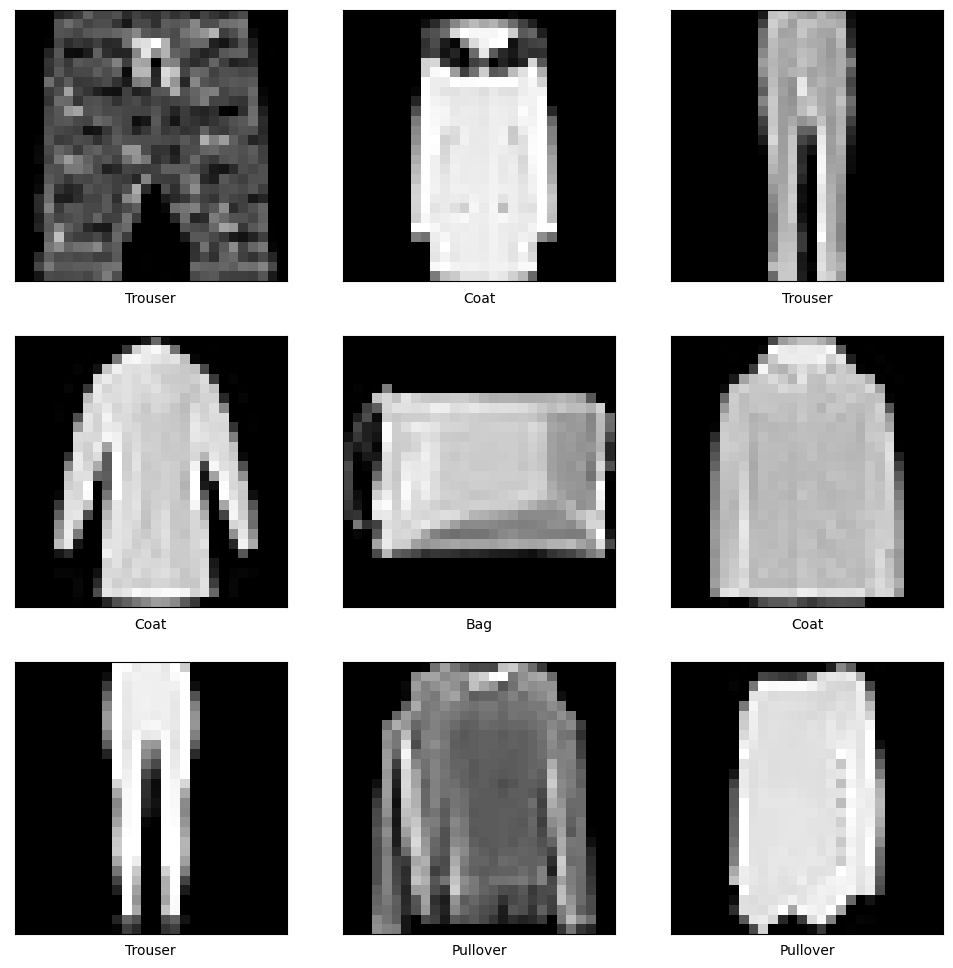

In [5]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt
import numpy as np

Indexes = np.random.randint(60000,
                            size = 9) 

plt.figure(figsize = (12, 12))
for i, idx in enumerate(Indexes):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[idx])])
    
plt.show()

* NumPy Array

In [6]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [7]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normalization

In [8]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [9]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


> ## 3) train_test split

In [19]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

# III. Keras Modeling

## Base Line

In [15]:
# model define
from tensorflow.keras import models, layers

fmnist = models.Sequential()
fmnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
fmnist.add(layers.Dense(256, activation = 'relu'))
fmnist.add(layers.Dense(10, activation = 'softmax'))
fmnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
# model compile
fmnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [20]:
# model fit
Hist_fmnist = fmnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 0.5792 - accuracy: 0.7885 - val_loss: 0.4092 - val_accuracy: 0.8509
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8549 - val_loss: 0.4083 - val_accuracy: 0.8606
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8709 - val_loss: 0.3204 - val_accuracy: 0.8826
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8798 - val_loss: 0.3367 - val_accuracy: 0.8783
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.8876 - val_loss: 0.3238 - val_accuracy: 0.8872
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.8936 - val_loss: 0.3135 - val_accuracy: 0.8938
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.8982 - val_loss: 0.3554 - val_accuracy: 0.8781

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1257 - accuracy: 0.9581 - val_loss: 0.8437 - val_accuracy: 0.8990
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9587 - val_loss: 0.9035 - val_accuracy: 0.8993
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9602 - val_loss: 1.0202 - val_accuracy: 0.8950
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1240 - accuracy: 0.9590 - val_loss: 1.0327 - val_accuracy: 0.8953
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9603 - val_loss: 1.0747 - val_accuracy: 0.8982
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1169 - accuracy: 0.9607 - val_loss: 1.0715 - val_accuracy: 0.8913
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1198 - accuracy: 0.9611 - val_loss: 0.9904 - val_accuracy:

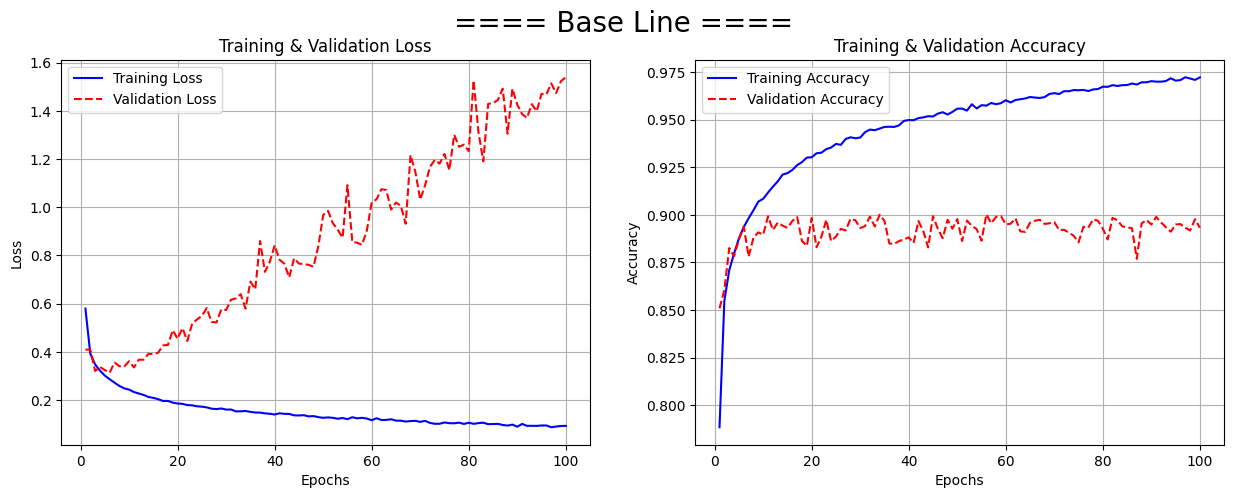

In [21]:
import matplotlib.pyplot as plt

Hist_model = Hist_fmnist
epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Base Line ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Model Capacity decay

In [22]:
# model define
from tensorflow.keras import models, layers

fmnist_c = models.Sequential()
fmnist_c.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
fmnist_c.add(layers.Dense(10, activation = 'softmax'))
fmnist_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [23]:
# model compile
fmnist_c.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [24]:
# model fit
Hist_fmnist_c = fmnist_c.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5879 - accuracy: 0.7912 - val_loss: 0.4575 - val_accuracy: 0.8350
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 0.4093 - accuracy: 0.8512 - val_loss: 0.3685 - val_accuracy: 0.8677
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3600 - accuracy: 0.8684 - val_loss: 0.3637 - val_accuracy: 0.8682
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.8779 - val_loss: 0.3817 - val_accuracy: 0.8671
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3110 - accuracy: 0.8851 - val_loss: 0.3316 - val_accuracy: 0.8815
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2931 - accuracy: 0.8910 - val_loss: 0.3164 - val_accuracy: 0.8855
Epoch 7/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2805 - accuracy: 0.8976 - val_loss: 0.3058 - val_accuracy: 0.8897

Epoch 58/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0766 - accuracy: 0.9723 - val_loss: 0.5706 - val_accuracy: 0.8918
Epoch 59/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0781 - accuracy: 0.9706 - val_loss: 0.6021 - val_accuracy: 0.8938
Epoch 60/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0748 - accuracy: 0.9734 - val_loss: 0.5751 - val_accuracy: 0.8921
Epoch 61/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0715 - accuracy: 0.9737 - val_loss: 0.5641 - val_accuracy: 0.8976
Epoch 62/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0722 - accuracy: 0.9739 - val_loss: 0.5692 - val_accuracy: 0.8975
Epoch 63/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0722 - accuracy: 0.9742 - val_loss: 0.5696 - val_accuracy: 0.8957
Epoch 64/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0675 - accuracy: 0.9754 - val_loss: 0.5816 - val_accuracy:

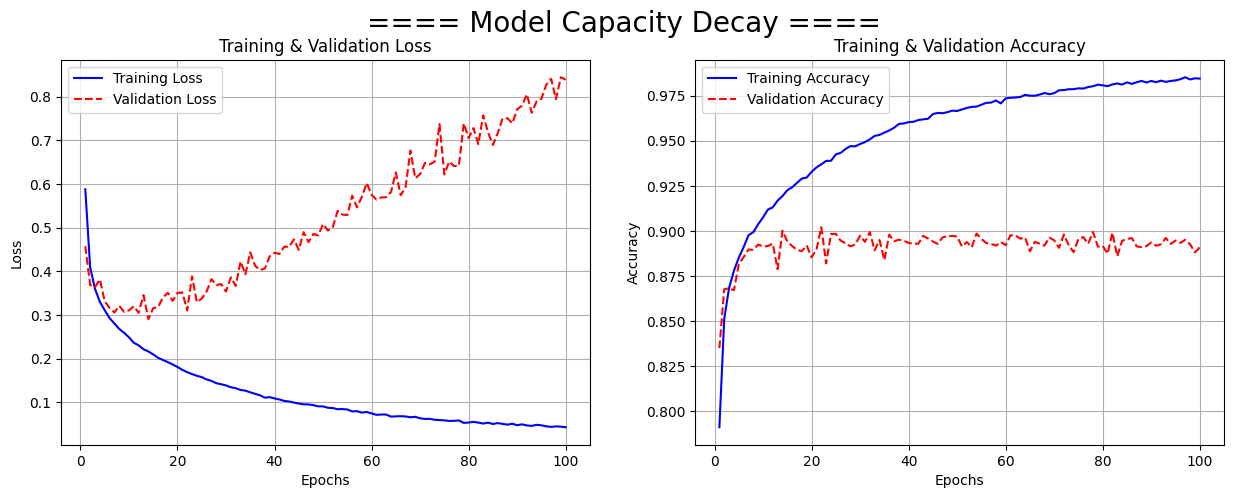

In [26]:
import matplotlib.pyplot as plt

Hist_model = Hist_fmnist_c

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Model Capacity Decay ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Regulazation

In [28]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R = models.Sequential()

fmnist_L2R.add(layers.Dense(512, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001), # l2 기본값 0.01
                       input_shape = (28 * 28,)))

fmnist_L2R.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))

fmnist_L2R.add(layers.Dense(10, activation = 'softmax'))

fmnist_L2R.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [29]:
fmnist_L2R.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [30]:
# %%time

Hist_fmnist_L2R = fmnist_L2R.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5866 - accuracy: 0.7897 - val_loss: 0.4053 - val_accuracy: 0.8554
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4052 - accuracy: 0.8537 - val_loss: 0.4329 - val_accuracy: 0.8450
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8704 - val_loss: 0.3689 - val_accuracy: 0.8734
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8807 - val_loss: 0.3454 - val_accuracy: 0.8775
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.8876 - val_loss: 0.3307 - val_accuracy: 0.8877
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.8925 - val_loss: 0.3209 - val_accuracy: 0.8934
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2902 - accuracy: 0.8974 - val_loss: 0.3193 - val_accuracy: 0.8942

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1467 - accuracy: 0.9567 - val_loss: 0.6333 - val_accuracy: 0.8883
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1442 - accuracy: 0.9590 - val_loss: 0.6833 - val_accuracy: 0.8832
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1482 - accuracy: 0.9576 - val_loss: 0.6719 - val_accuracy: 0.8881
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1423 - accuracy: 0.9589 - val_loss: 0.6339 - val_accuracy: 0.8898
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.9591 - val_loss: 0.6006 - val_accuracy: 0.8968
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9596 - val_loss: 0.6574 - val_accuracy: 0.8922
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1426 - accuracy: 0.9581 - val_loss: 0.6297 - val_accuracy:

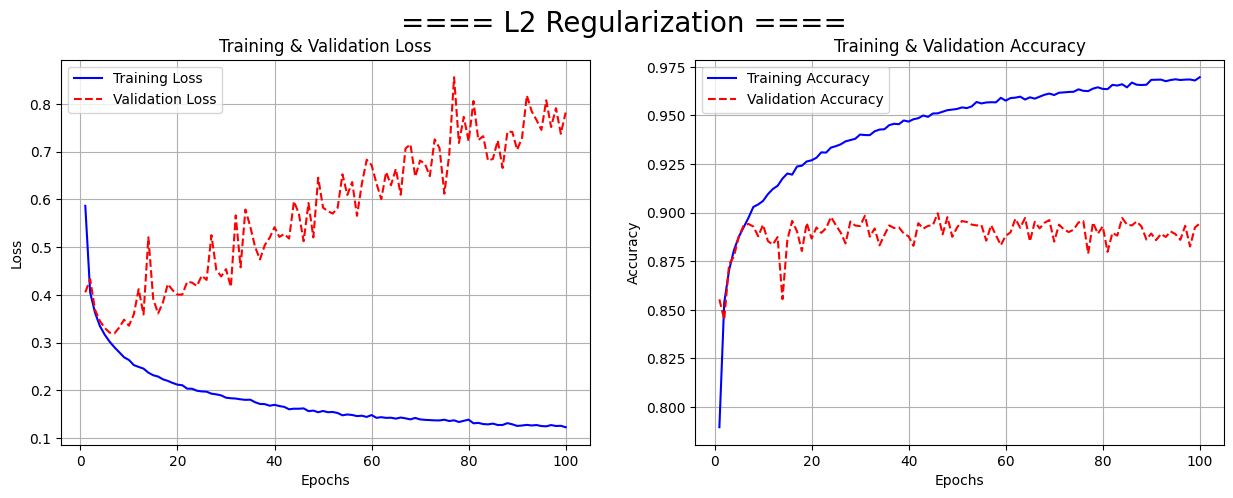

In [31]:
import matplotlib.pyplot as plt

Hist_model = Hist_fmnist_L2R

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Drop out

In [33]:
fmnist_D = models.Sequential()

fmnist_D.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
fmnist_D.add(layers.Dropout(0.4))

fmnist_D.add(layers.Dense(256, activation = 'relu'))
fmnist_D.add(layers.Dropout(0.2))

fmnist_D.add(layers.Dense(10, activation = 'softmax'))

fmnist_D.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [34]:
fmnist_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [35]:
# %%time
Hist_fmnist_D = fmnist_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6366 - accuracy: 0.7707 - val_loss: 0.4196 - val_accuracy: 0.8432
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4485 - accuracy: 0.8359 - val_loss: 0.4017 - val_accuracy: 0.8448
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4119 - accuracy: 0.8507 - val_loss: 0.3567 - val_accuracy: 0.8700
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3892 - accuracy: 0.8594 - val_loss: 0.3686 - val_accuracy: 0.8567
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3744 - accuracy: 0.8648 - val_loss: 0.3390 - val_accuracy: 0.8780
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.8684 - val_loss: 0.3701 - val_accuracy: 0.8693
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3563 - accuracy: 0.8745 - val_loss: 0.3528 - val_accuracy: 0.8761

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2609 - accuracy: 0.9131 - val_loss: 0.4370 - val_accuracy: 0.8987
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2565 - accuracy: 0.9124 - val_loss: 0.4675 - val_accuracy: 0.9004
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.9156 - val_loss: 0.4575 - val_accuracy: 0.9028
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2635 - accuracy: 0.9118 - val_loss: 0.4659 - val_accuracy: 0.9006
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2546 - accuracy: 0.9145 - val_loss: 0.4474 - val_accuracy: 0.9003
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2585 - accuracy: 0.9143 - val_loss: 0.4642 - val_accuracy: 0.9007
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.9139 - val_loss: 0.4621 - val_accuracy:

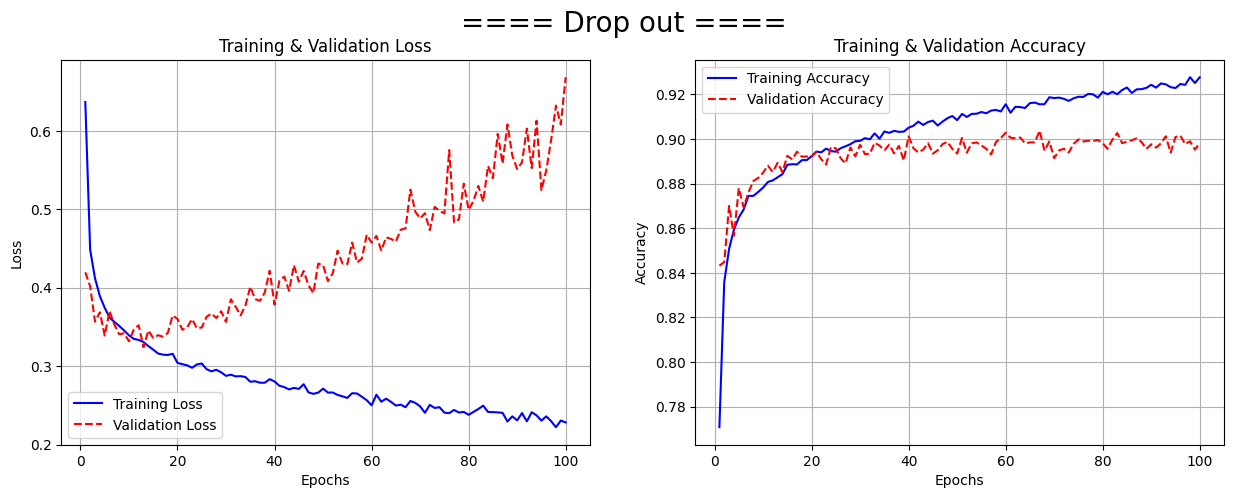

In [36]:
import matplotlib.pyplot as plt

Hist_model = Hist_fmnist_D

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Drop out ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Batch Normalization

In [55]:
fmnist_BN = models.Sequential()

fmnist_BN.add(layers.Dense(512, input_shape = (28 * 28,)))
fmnist_BN.add(layers.BatchNormalization())
fmnist_BN.add(layers.Activation('relu'))

fmnist_BN.add(layers.Dense(256 ))
fmnist_BN.add(layers.BatchNormalization())
fmnist_BN.add(layers.Activation('relu'))

fmnist_BN.add(layers.Dense(10, activation = 'softmax'))
fmnist_BN.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 256)              

In [56]:
fmnist_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [57]:
# %%time

Hist_fmnist_BN = fmnist_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4463 - accuracy: 0.8364 - val_loss: 0.4340 - val_accuracy: 0.8378
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8779 - val_loss: 0.4900 - val_accuracy: 0.8263
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2852 - accuracy: 0.8938 - val_loss: 0.3711 - val_accuracy: 0.8664
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2540 - accuracy: 0.9041 - val_loss: 0.3756 - val_accuracy: 0.8687
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2317 - accuracy: 0.9138 - val_loss: 0.3643 - val_accuracy: 0.8717
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2094 - accuracy: 0.9210 - val_loss: 0.4256 - val_accuracy: 0.8635
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1919 - accuracy: 0.9285 - val_loss: 0.3862 - val_accuracy: 0.8750

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0214 - accuracy: 0.9927 - val_loss: 0.7853 - val_accuracy: 0.8917
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.7972 - val_accuracy: 0.8976
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.7819 - val_accuracy: 0.8924
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 1.0514 - val_accuracy: 0.8825
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.9618 - val_accuracy: 0.8913
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.8500 - val_accuracy: 0.8947
Epoch 64/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.9205 - val_accuracy:

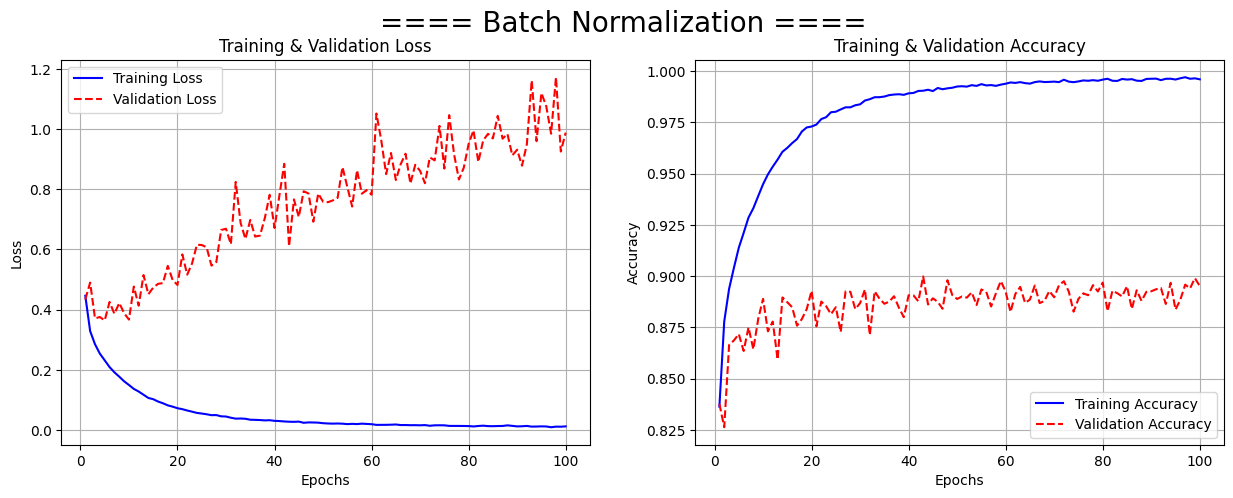

In [58]:
import matplotlib.pyplot as plt

Hist_model = Hist_fmnist_BN

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Result Comparison

In [59]:
hist_model_name = ['Hist_fmnist', 'Hist_fmnist_L2R', 'Hist_fmnist_D', 'Hist_fmnist_BN']
hist_model_list = [Hist_fmnist, Hist_fmnist_L2R, Hist_fmnist_D, Hist_fmnist_BN]

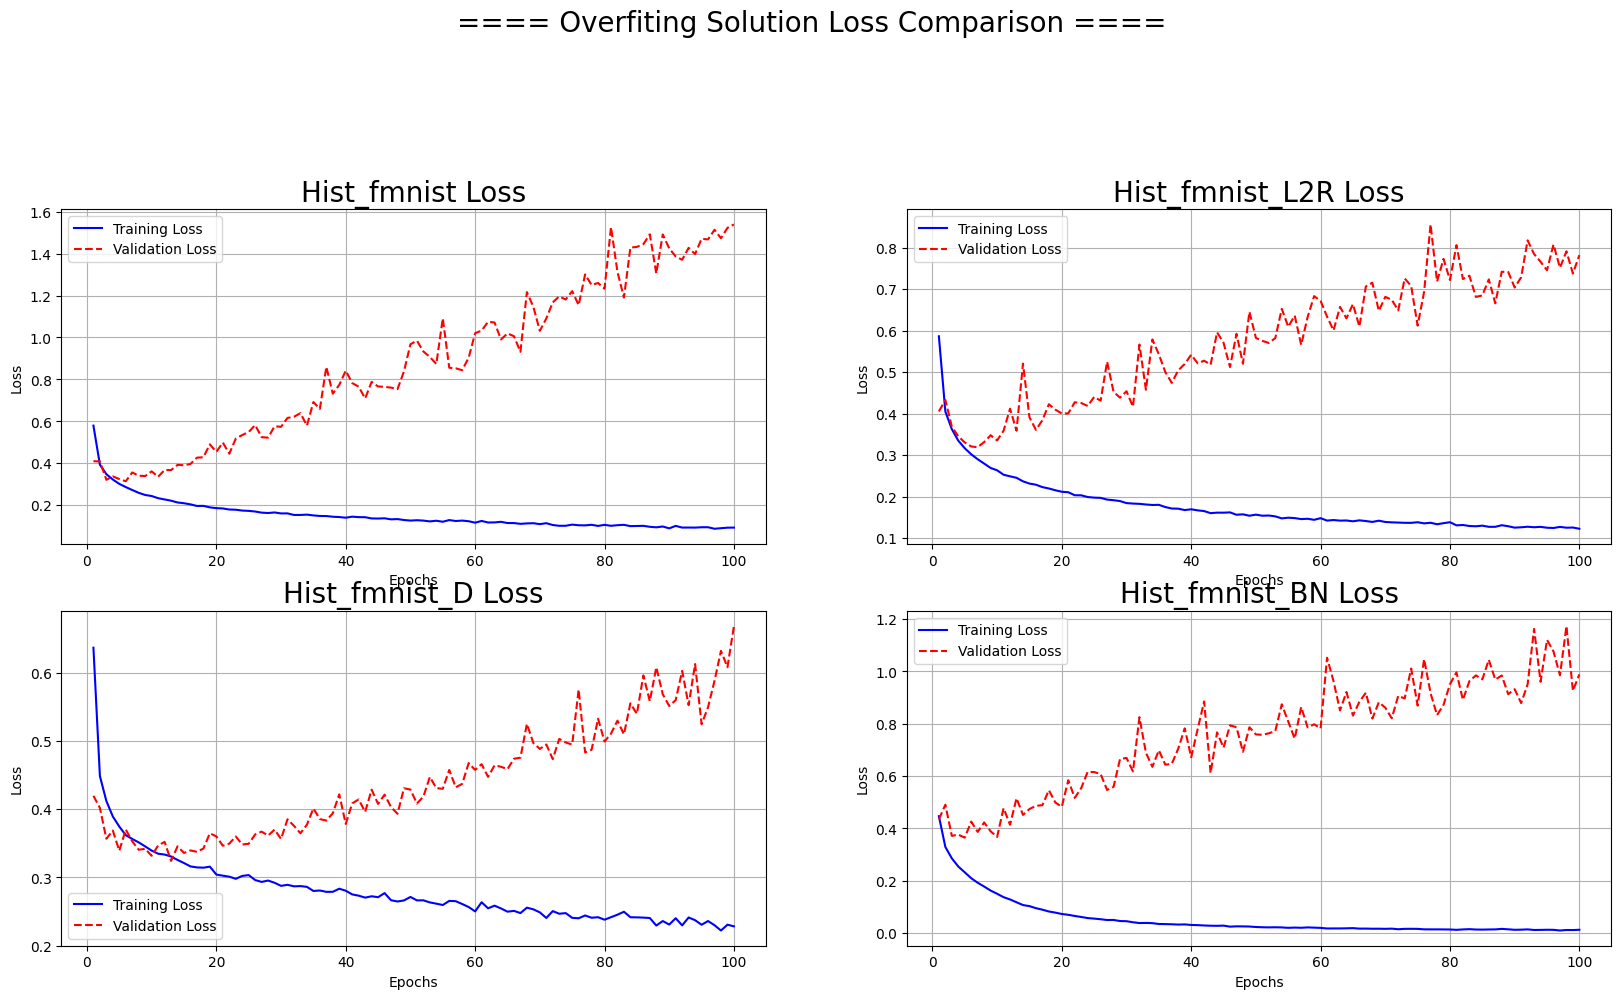

In [60]:
import matplotlib.pyplot as plt

epochs = range(1, 101)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Loss Comparison ====', fontsize=20)


for i in range(len(hist_model_list)):
    plt.subplot(len(hist_model_list), int(len(hist_model_list)/2), i+1)
    plt.plot(epochs, hist_model_list[i].history['loss'], 'b-')
    plt.plot(epochs, hist_model_list[i].history['val_loss'], 'r--')
    plt.title(f'{str(hist_model_name[i])} Loss', fontsize=20)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

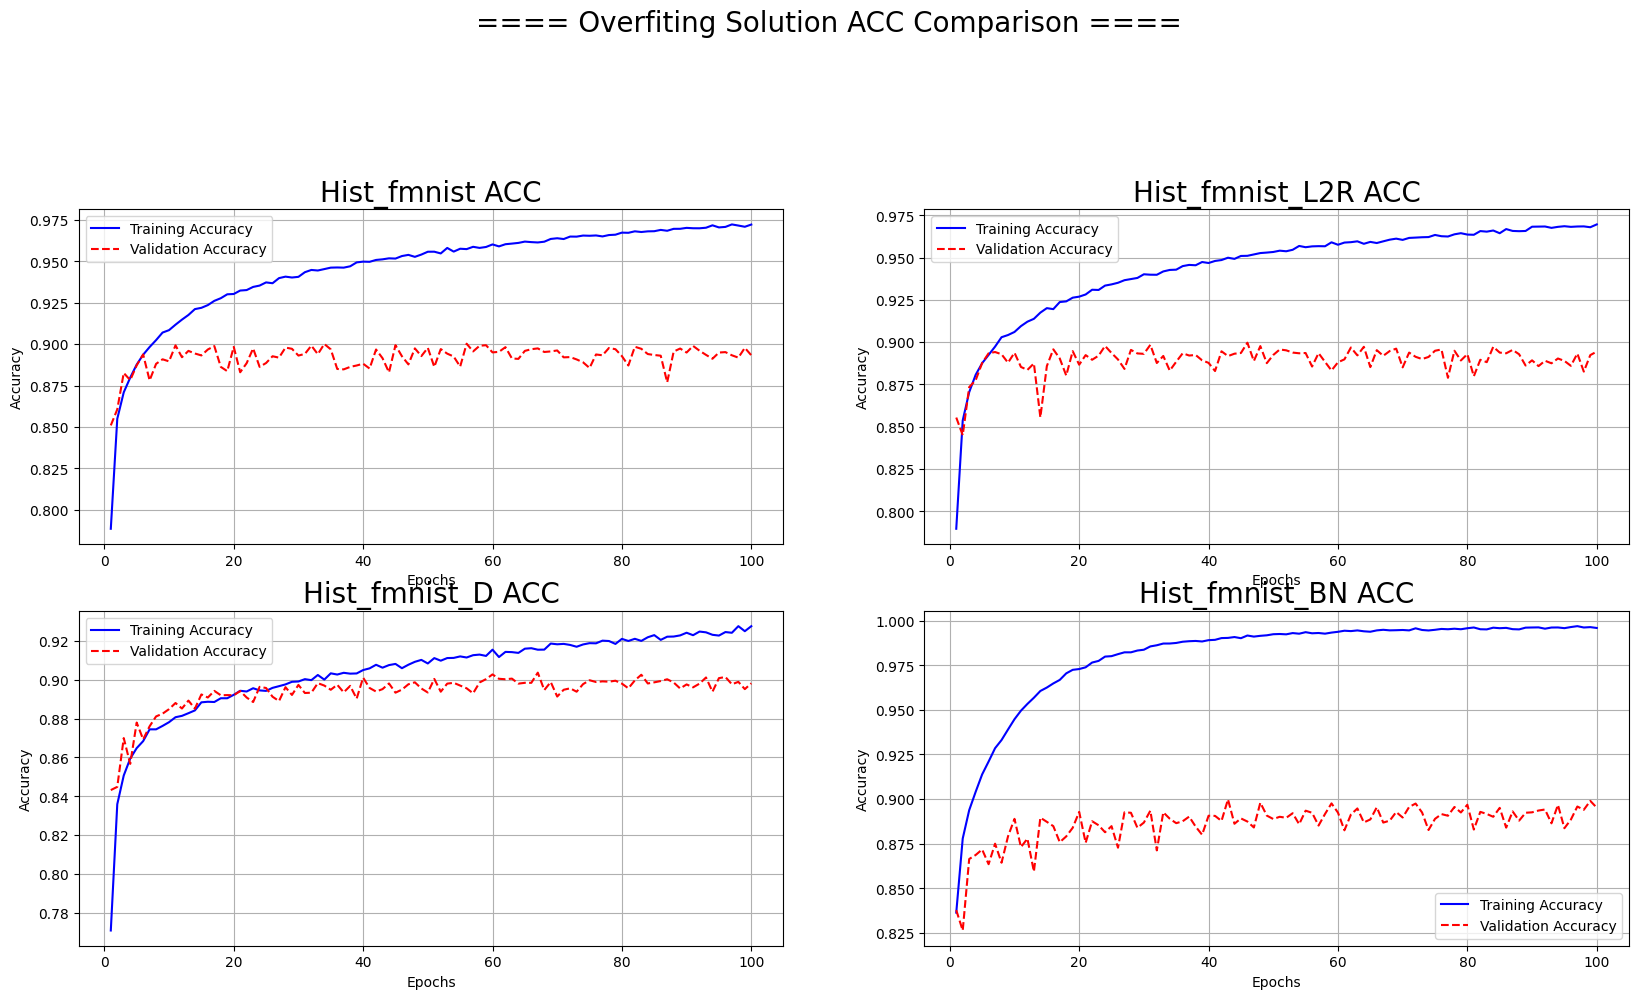

In [61]:
import matplotlib.pyplot as plt

epochs = range(1, 101)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution ACC Comparison ====', fontsize=20)


for i in range(len(hist_model_list)):
    plt.subplot(len(hist_model_list), int(len(hist_model_list)/2), i+1)
    plt.plot(epochs, hist_model_list[i].history['accuracy'], 'b-')
    plt.plot(epochs, hist_model_list[i].history['val_accuracy'], 'r--')
    plt.title(f'{str(hist_model_name[i])} ACC', fontsize=20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.grid()

plt.show()

# Solution Combination

## Batch Normalization & Drop out

In [62]:
fmnist_BN_D = models.Sequential()

fmnist_BN_D.add(layers.Dense(512, input_shape = (28 * 28,)))
fmnist_BN_D.add(layers.BatchNormalization())
fmnist_BN_D.add(layers.Activation('relu'))
fmnist_BN_D.add(layers.Dropout(0.4))

fmnist_BN_D.add(layers.Dense(256 ))
fmnist_BN_D.add(layers.BatchNormalization())
fmnist_BN_D.add(layers.Activation('relu'))
fmnist_BN_D.add(layers.Dropout(0.4))

fmnist_BN_D.add(layers.Dense(10, activation = 'softmax'))
fmnist_BN_D.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [63]:
fmnist_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [64]:
# %%time

Hist_fmnist_BN_D = fmnist_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.5535 - accuracy: 0.8033 - val_loss: 0.3938 - val_accuracy: 0.8567
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8481 - val_loss: 0.4276 - val_accuracy: 0.8445
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.8632 - val_loss: 0.3407 - val_accuracy: 0.8788
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3580 - accuracy: 0.8705 - val_loss: 0.3489 - val_accuracy: 0.8736
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8765 - val_loss: 0.3502 - val_accuracy: 0.8775
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8814 - val_loss: 0.3436 - val_accuracy: 0.8798
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.8855 - val_loss: 0.3367 - val_accuracy: 0.8802

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0.9460 - val_loss: 0.4289 - val_accuracy: 0.8959
Epoch 59/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1521 - accuracy: 0.9474 - val_loss: 0.4104 - val_accuracy: 0.9032
Epoch 60/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1482 - accuracy: 0.9475 - val_loss: 0.4906 - val_accuracy: 0.8947
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1494 - accuracy: 0.9484 - val_loss: 0.4947 - val_accuracy: 0.8980
Epoch 62/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1492 - accuracy: 0.9472 - val_loss: 0.4500 - val_accuracy: 0.8978
Epoch 63/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9485 - val_loss: 0.5451 - val_accuracy: 0.8833
Epoch 64/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1417 - accuracy: 0.9506 - val_loss: 0.4654 - val_accuracy:

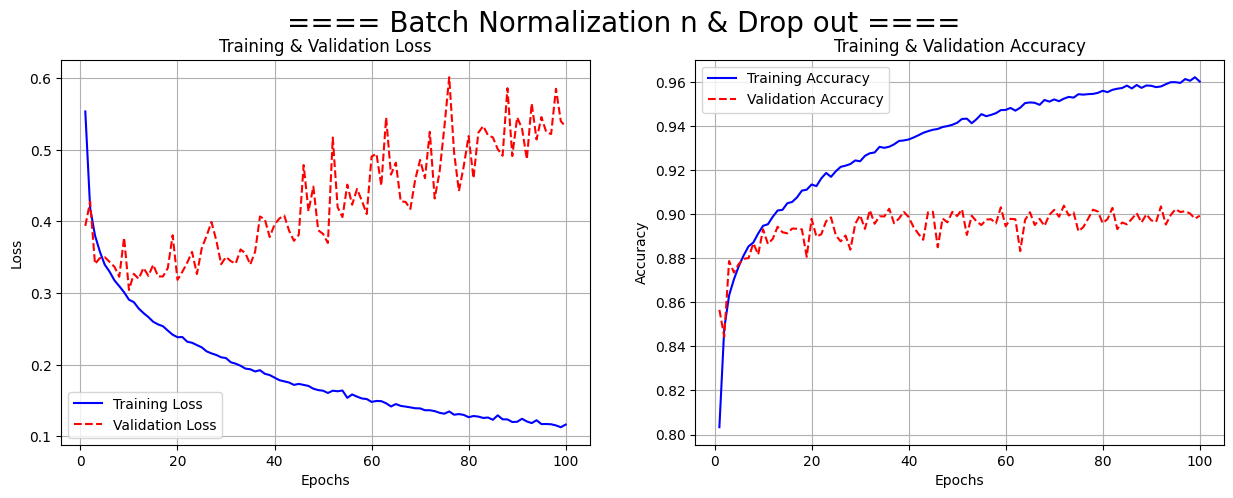

In [74]:
import matplotlib.pyplot as plt

history_model = Hist_fmnist_BN_D

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization n & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## L2 Regularization & Drop out

In [75]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_D = models.Sequential()

fmnist_L2R_D.add(layers.Dense(512, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_D.add(layers.Dropout(0.4))

fmnist_L2R_D.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_D.add(layers.Dropout(0.2))

fmnist_L2R_D.add(layers.Dense(10, activation = 'softmax'))
fmnist_L2R_D.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [76]:
fmnist_L2R_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [68]:
# %%time

Hist_fmnist_L2R_D = fmnist_L2R_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6385 - accuracy: 0.7704 - val_loss: 0.4249 - val_accuracy: 0.8485
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4614 - accuracy: 0.8360 - val_loss: 0.4046 - val_accuracy: 0.8566
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8497 - val_loss: 0.3778 - val_accuracy: 0.8705
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8585 - val_loss: 0.3773 - val_accuracy: 0.8727
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3907 - accuracy: 0.8629 - val_loss: 0.3587 - val_accuracy: 0.8798
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8666 - val_loss: 0.3701 - val_accuracy: 0.8712
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3709 - accuracy: 0.8695 - val_loss: 0.3408 - val_accuracy: 0.8867

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.9065 - val_loss: 0.3924 - val_accuracy: 0.8898
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.9054 - val_loss: 0.3721 - val_accuracy: 0.8968
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2900 - accuracy: 0.9069 - val_loss: 0.3769 - val_accuracy: 0.8957
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2931 - accuracy: 0.9078 - val_loss: 0.3820 - val_accuracy: 0.8957
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2898 - accuracy: 0.9076 - val_loss: 0.3889 - val_accuracy: 0.8930
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.9064 - val_loss: 0.3769 - val_accuracy: 0.8982
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2901 - accuracy: 0.9091 - val_loss: 0.3947 - val_accuracy:

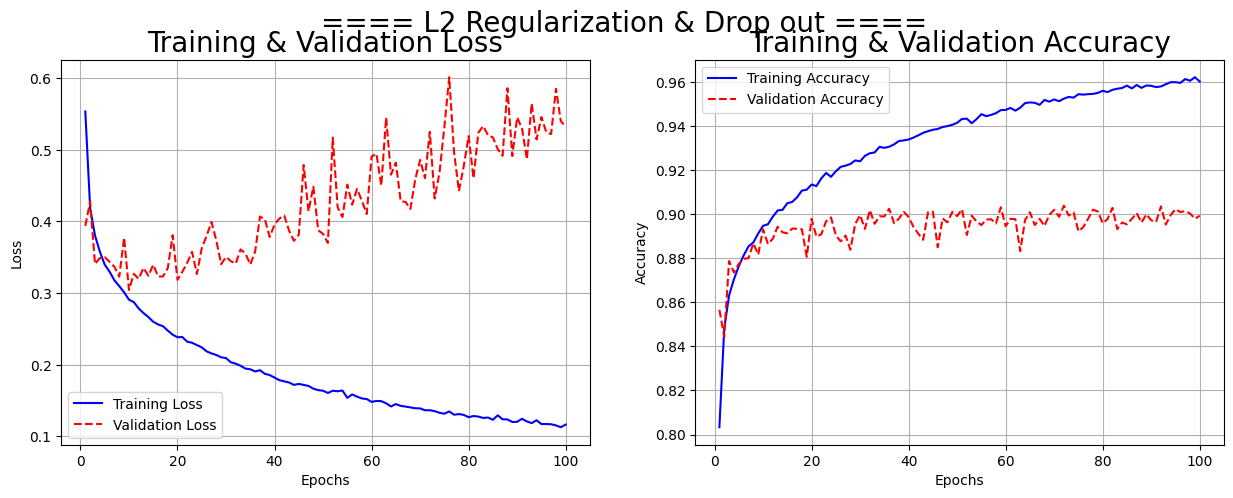

In [77]:
import matplotlib.pyplot as plt

history_model = Hist_fmnist_BN_D

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## L2 Regularization & Batch Normalization

In [78]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_BN = models.Sequential()

fmnist_L2R_BN.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_BN.add(layers.BatchNormalization())
fmnist_L2R_BN.add(layers.Activation('relu'))


fmnist_L2R_BN.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_BN.add(layers.BatchNormalization())
fmnist_L2R_BN.add(layers.Activation('relu'))


fmnist_L2R_BN.add(layers.Dense(10, activation = 'softmax'))
fmnist_L2R_BN.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_9 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 256)             

In [79]:
fmnist_L2R_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [72]:
# %%time

Hist_fmnist_L2R_BN = fmnist_L2R_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.8382 - val_loss: 0.3734 - val_accuracy: 0.8668
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8776 - val_loss: 0.4362 - val_accuracy: 0.8492
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2986 - accuracy: 0.8939 - val_loss: 0.3479 - val_accuracy: 0.8789
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9030 - val_loss: 0.3749 - val_accuracy: 0.8741
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.9124 - val_loss: 0.3559 - val_accuracy: 0.8825
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2307 - accuracy: 0.9202 - val_loss: 0.3754 - val_accuracy: 0.8785
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2143 - accuracy: 0.9260 - val_loss: 0.3912 - val_accuracy: 0.8796

Epoch 58/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9878 - val_loss: 0.7697 - val_accuracy: 0.8915
Epoch 59/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9875 - val_loss: 0.7806 - val_accuracy: 0.8846
Epoch 60/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0815 - accuracy: 0.9872 - val_loss: 0.8438 - val_accuracy: 0.8903
Epoch 61/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9884 - val_loss: 0.8935 - val_accuracy: 0.8737
Epoch 62/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.9892 - val_loss: 0.8045 - val_accuracy: 0.8903
Epoch 63/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.9886 - val_loss: 0.8947 - val_accuracy: 0.8879
Epoch 64/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9894 - val_loss: 0.8661 - val_accuracy:

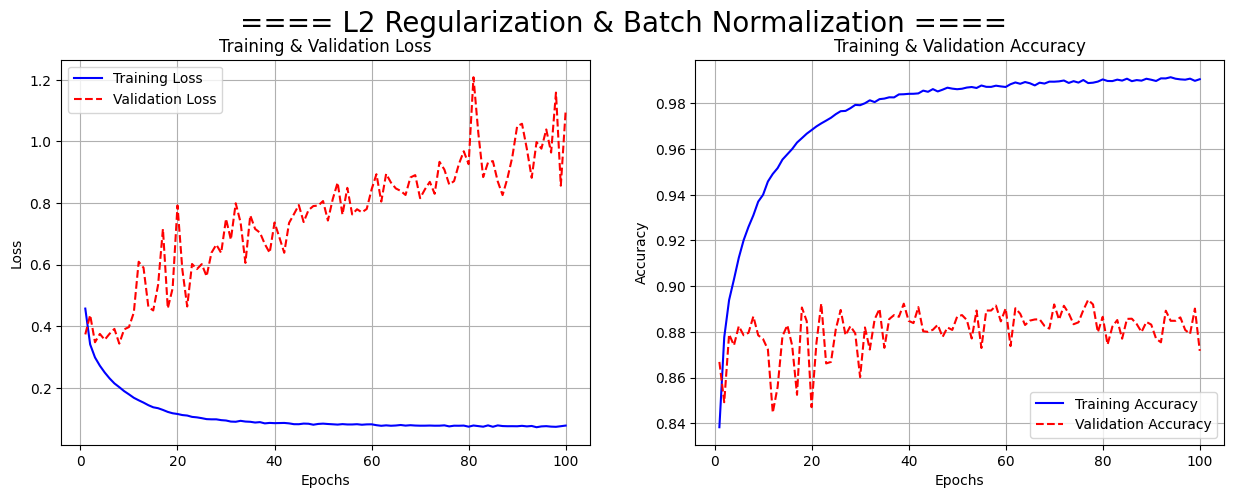

In [80]:
import matplotlib.pyplot as plt

history_model = Hist_fmnist_L2R_BN

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## L2 Regularization & Batch Normalization & Drop out

In [82]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_BN_D = models.Sequential()
fmnist_L2R_BN_D.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_BN_D.add(layers.BatchNormalization())
fmnist_L2R_BN_D.add(layers.Activation('relu'))
fmnist_L2R_BN_D.add(layers.Dropout(0.4))

fmnist_L2R_BN_D.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_BN_D.add(layers.BatchNormalization())
fmnist_L2R_BN_D.add(layers.Activation('relu'))
fmnist_L2R_BN_D.add(layers.Dropout(0.2))

fmnist_L2R_BN_D.add(layers.Dense(10, activation = 'softmax'))
fmnist_L2R_BN_D.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_12 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [83]:
fmnist_L2R_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [84]:
# %%time

Hist_fmnist_L2R_BN_D = fmnist_L2R_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.5340 - accuracy: 0.8113 - val_loss: 0.4281 - val_accuracy: 0.8492
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.8553 - val_loss: 0.3909 - val_accuracy: 0.8593
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8670 - val_loss: 0.3904 - val_accuracy: 0.8669
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.8744 - val_loss: 0.3423 - val_accuracy: 0.8817
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8794 - val_loss: 0.3581 - val_accuracy: 0.8771
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8840 - val_loss: 0.3881 - val_accuracy: 0.8721
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8912 - val_loss: 0.3461 - val_accuracy: 0.8842

Epoch 58/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2069 - accuracy: 0.9454 - val_loss: 0.4868 - val_accuracy: 0.8907
Epoch 59/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2049 - accuracy: 0.9463 - val_loss: 0.4997 - val_accuracy: 0.8938
Epoch 60/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2060 - accuracy: 0.9473 - val_loss: 0.4704 - val_accuracy: 0.8959
Epoch 61/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2057 - accuracy: 0.9466 - val_loss: 0.5282 - val_accuracy: 0.8882
Epoch 62/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2052 - accuracy: 0.9474 - val_loss: 0.4925 - val_accuracy: 0.8988
Epoch 63/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2042 - accuracy: 0.9483 - val_loss: 0.4551 - val_accuracy: 0.8938
Epoch 64/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2023 - accuracy: 0.9497 - val_loss: 0.4677 - val_accuracy:

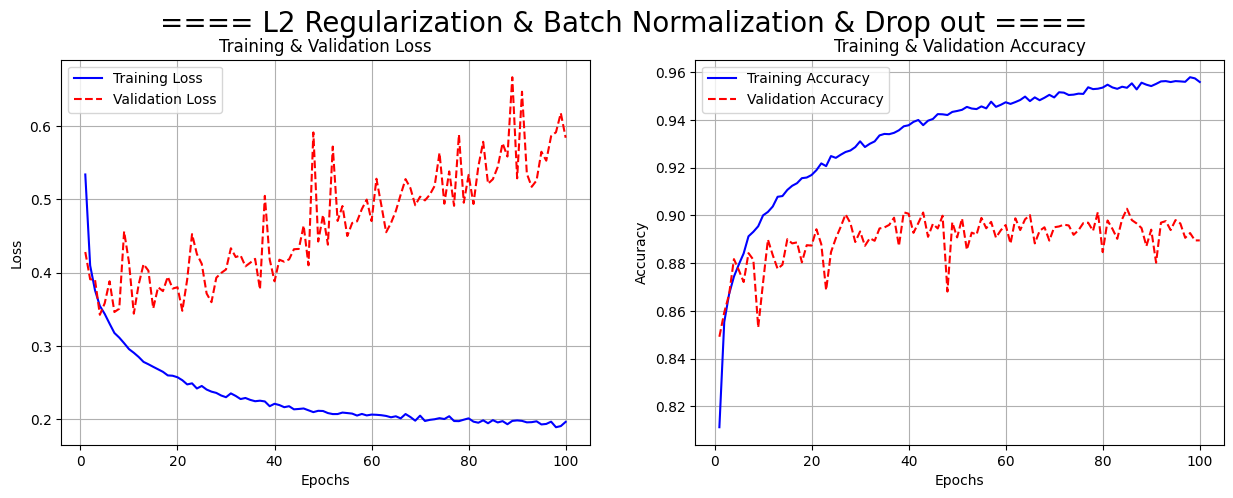

In [85]:
import matplotlib.pyplot as plt


history_model = Hist_fmnist_L2R_BN_D

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Result Comparison

In [86]:
hist_model_name = ['Hist_fmnist_L2R_BN', 'Hist_fmnist_L2R_D', 'Hist_fmnist_BN_D', 'Hist_fmnist_L2R_BN_D']
hist_model_list = [Hist_fmnist_L2R_BN, Hist_fmnist_L2R_D, Hist_fmnist_BN_D, Hist_fmnist_L2R_BN_D]

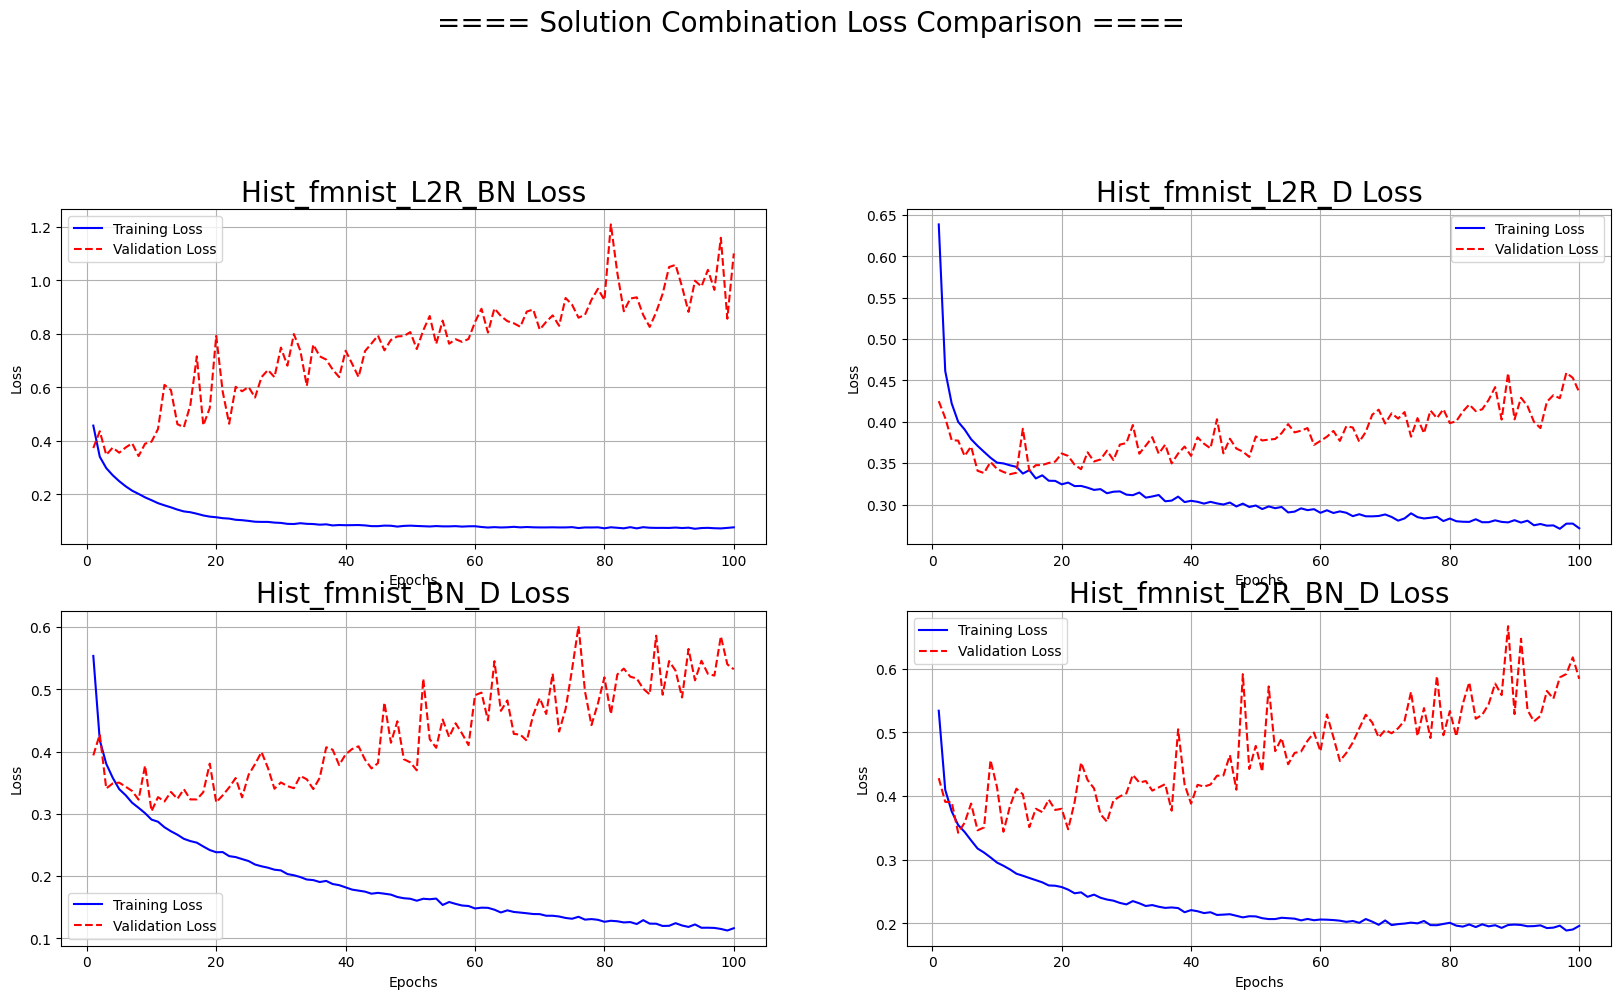

In [87]:
import matplotlib.pyplot as plt

epochs = range(1, 101)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Solution Combination Loss Comparison ====', fontsize=20)


for i in range(len(hist_model_list)):
    plt.subplot(len(hist_model_list), int(len(hist_model_list)/2), i+1)
    plt.plot(epochs, hist_model_list[i].history['loss'], 'b-')
    plt.plot(epochs, hist_model_list[i].history['val_loss'], 'r--')
    plt.title(f'{str(hist_model_name[i])} Loss', fontsize=20)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

# L2 R +Drop Out Combination Develop

## L2 R +Drop Out + Capacity Decay 1

In [89]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_D_C1 = models.Sequential()

fmnist_L2R_D_C1.add(layers.Dense(256, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_D_C1.add(layers.Dropout(0.4))

fmnist_L2R_D_C1.add(layers.Dense(128, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_D_C1.add(layers.Dropout(0.2))

fmnist_L2R_D_C1.add(layers.Dense(10, activation = 'softmax'))

fmnist_L2R_D_C1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 256)               200960    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [91]:
fmnist_L2R_D_C1.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_fmnist_L2R_D_C1 = fmnist_L2R_D_C1.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6580 - accuracy: 0.7658 - val_loss: 0.4551 - val_accuracy: 0.8335
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.8311 - val_loss: 0.4002 - val_accuracy: 0.8523
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8477 - val_loss: 0.3729 - val_accuracy: 0.8697
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8550 - val_loss: 0.3589 - val_accuracy: 0.8713
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8625 - val_loss: 0.3457 - val_accuracy: 0.8796
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3795 - accuracy: 0.8666 - val_loss: 0.3533 - val_accuracy: 0.8813
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8699 - val_loss: 0.3481 - val_accuracy: 0.8848

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.9077 - val_loss: 0.3704 - val_accuracy: 0.8922
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2868 - accuracy: 0.9057 - val_loss: 0.3823 - val_accuracy: 0.8954
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2840 - accuracy: 0.9087 - val_loss: 0.3717 - val_accuracy: 0.8973
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2820 - accuracy: 0.9099 - val_loss: 0.3652 - val_accuracy: 0.8958
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.9082 - val_loss: 0.3709 - val_accuracy: 0.8941
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.9087 - val_loss: 0.3759 - val_accuracy: 0.8979
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.9094 - val_loss: 0.3902 - val_accuracy:

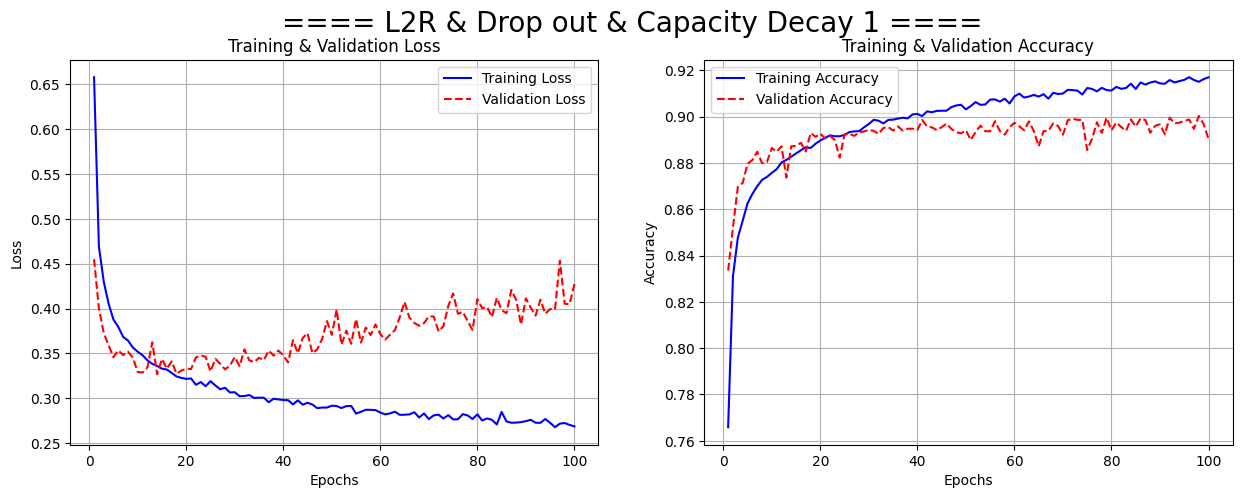

In [92]:
import matplotlib.pyplot as plt


history_model = Hist_fmnist_L2R_D_C1

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2R & Drop out & Capacity Decay 1 ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [112]:
loss, accuracy = fmnist_L2R_D_C1.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.48200
Accuracy = 0.88020


## L2 R +Drop Out 1 + Capacity Decay 1

In [106]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_D1_C1 = models.Sequential()

fmnist_L2R_D1_C1.add(layers.Dense(256, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_D1_C1.add(layers.Dropout(0.5))

fmnist_L2R_D1_C1.add(layers.Dense(128, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_D1_C1.add(layers.Dropout(0.5))

fmnist_L2R_D1_C1.add(layers.Dense(10, activation = 'softmax'))

fmnist_L2R_D1_C1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 256)               200960    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_60 (Dense)            (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_61 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [107]:
fmnist_L2R_D1_C1.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_fmnist_L2R_D1_C1 = fmnist_L2R_D1_C1.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7728 - accuracy: 0.7277 - val_loss: 0.4580 - val_accuracy: 0.8382
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.8149 - val_loss: 0.4191 - val_accuracy: 0.8453
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4841 - accuracy: 0.8324 - val_loss: 0.4068 - val_accuracy: 0.8603
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4618 - accuracy: 0.8386 - val_loss: 0.3876 - val_accuracy: 0.8613
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8480 - val_loss: 0.3802 - val_accuracy: 0.8667
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8508 - val_loss: 0.3737 - val_accuracy: 0.8753
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8543 - val_loss: 0.3878 - val_accuracy: 0.8731

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8857 - val_loss: 0.4072 - val_accuracy: 0.8904
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.8841 - val_loss: 0.4059 - val_accuracy: 0.8871
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8822 - val_loss: 0.3948 - val_accuracy: 0.8885
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8840 - val_loss: 0.4187 - val_accuracy: 0.8856
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8842 - val_loss: 0.4182 - val_accuracy: 0.8869
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8844 - val_loss: 0.4132 - val_accuracy: 0.8838
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8863 - val_loss: 0.3829 - val_accuracy:

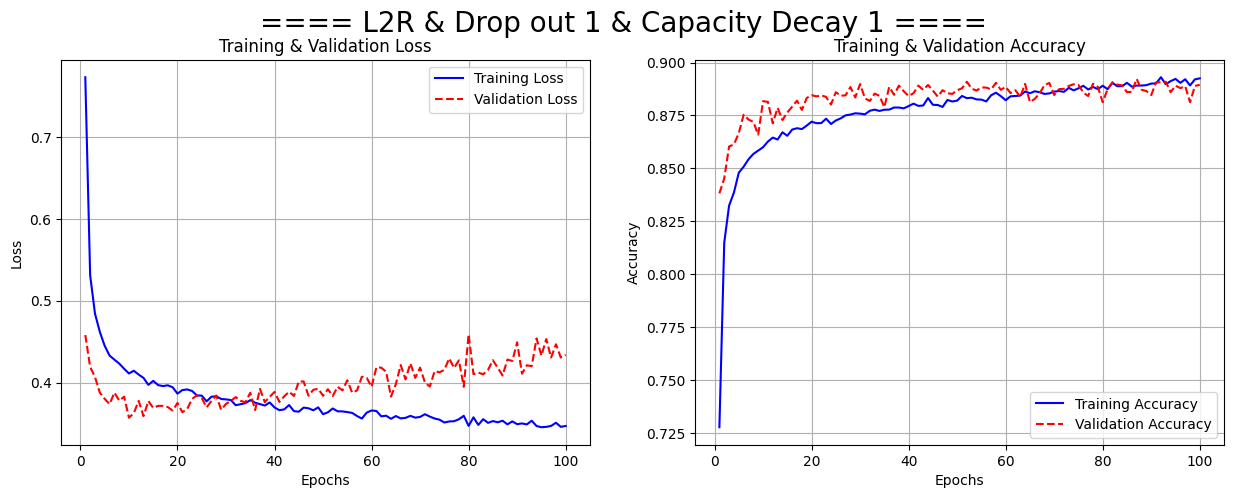

In [108]:
import matplotlib.pyplot as plt


history_model = Hist_fmnist_L2R_D1_C1

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2R & Drop out 1 & Capacity Decay 1 ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [113]:
loss, accuracy = fmnist_L2R_D1_C1.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.47203
Accuracy = 0.87600


## L2 R +Drop Out + Capacity Decay 2

In [93]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_D_C2 = models.Sequential()

fmnist_L2R_D_C2.add(layers.Dense(128, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_D_C2.add(layers.Dropout(0.4))

fmnist_L2R_D_C2.add(layers.Dense(64, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_D_C2.add(layers.Dropout(0.2))

fmnist_L2R_D_C2.add(layers.Dense(10, activation = 'softmax'))

fmnist_L2R_D_C2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               100480    
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [94]:
fmnist_L2R_D_C2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_fmnist_L2R_D_C2 = fmnist_L2R_D_C2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7509 - accuracy: 0.7351 - val_loss: 0.4526 - val_accuracy: 0.8366
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5101 - accuracy: 0.8180 - val_loss: 0.4106 - val_accuracy: 0.8519
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4598 - accuracy: 0.8370 - val_loss: 0.3825 - val_accuracy: 0.8634
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8446 - val_loss: 0.3818 - val_accuracy: 0.8672
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8518 - val_loss: 0.3840 - val_accuracy: 0.8658
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8553 - val_loss: 0.3632 - val_accuracy: 0.8735
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8606 - val_loss: 0.3737 - val_accuracy: 0.8726

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.8960 - val_loss: 0.3517 - val_accuracy: 0.8911
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8970 - val_loss: 0.3524 - val_accuracy: 0.8921
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3055 - accuracy: 0.8948 - val_loss: 0.3645 - val_accuracy: 0.8913
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.8990 - val_loss: 0.3523 - val_accuracy: 0.8944
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3026 - accuracy: 0.8970 - val_loss: 0.3830 - val_accuracy: 0.8871
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3033 - accuracy: 0.8979 - val_loss: 0.3654 - val_accuracy: 0.8895
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.8974 - val_loss: 0.3557 - val_accuracy:

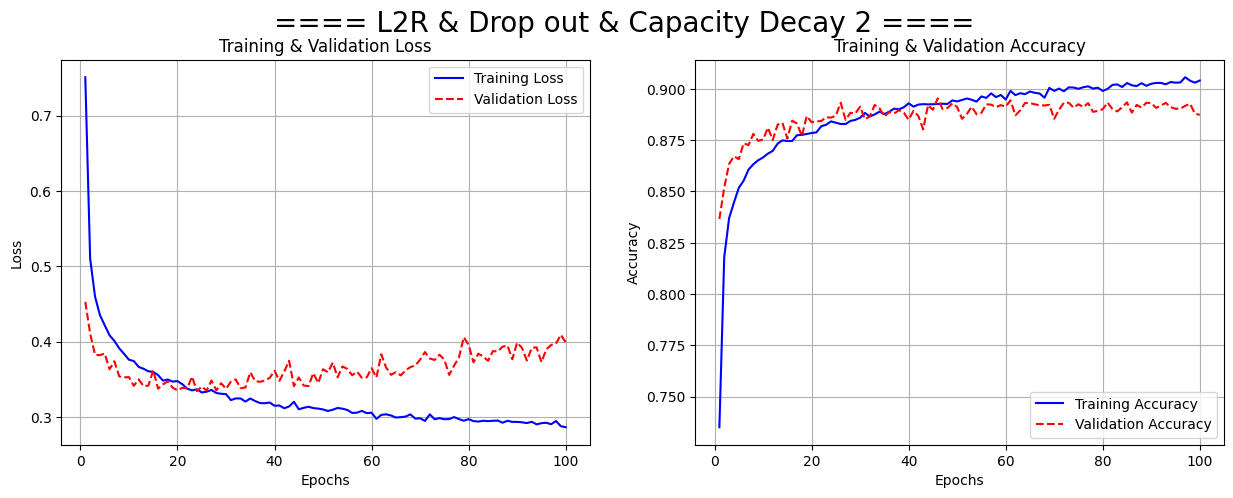

In [95]:
import matplotlib.pyplot as plt


history_model = Hist_fmnist_L2R_D_C2

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2R & Drop out & Capacity Decay 2 ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [114]:
loss, accuracy = fmnist_L2R_D_C2.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.44249
Accuracy = 0.88160


## L2 R +Drop Out1+ Capacity Decay 2

In [109]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_D1_C2 = models.Sequential()

fmnist_L2R_D1_C2.add(layers.Dense(128, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_D1_C2.add(layers.Dropout(0.5))

fmnist_L2R_D1_C2.add(layers.Dense(64, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_D1_C2.add(layers.Dropout(0.5))

fmnist_L2R_D1_C2.add(layers.Dense(10, activation = 'softmax'))

fmnist_L2R_D1_C2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               100480    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_64 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [110]:
fmnist_L2R_D1_C2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_fmnist_L2R_D1_C2 = fmnist_L2R_D1_C2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9444 - accuracy: 0.6743 - val_loss: 0.4877 - val_accuracy: 0.8280
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6080 - accuracy: 0.7916 - val_loss: 0.4328 - val_accuracy: 0.8496
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5450 - accuracy: 0.8132 - val_loss: 0.4059 - val_accuracy: 0.8569
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.8249 - val_loss: 0.4003 - val_accuracy: 0.8554
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.8326 - val_loss: 0.3928 - val_accuracy: 0.8571
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.8374 - val_loss: 0.3843 - val_accuracy: 0.8691
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4720 - accuracy: 0.8397 - val_loss: 0.3799 - val_accuracy: 0.8696

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8700 - val_loss: 0.4092 - val_accuracy: 0.8771
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8692 - val_loss: 0.4067 - val_accuracy: 0.8804
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8676 - val_loss: 0.4038 - val_accuracy: 0.8794
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8708 - val_loss: 0.4127 - val_accuracy: 0.8796
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8709 - val_loss: 0.4309 - val_accuracy: 0.8770
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8706 - val_loss: 0.4007 - val_accuracy: 0.8818
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3937 - accuracy: 0.8710 - val_loss: 0.4146 - val_accuracy:

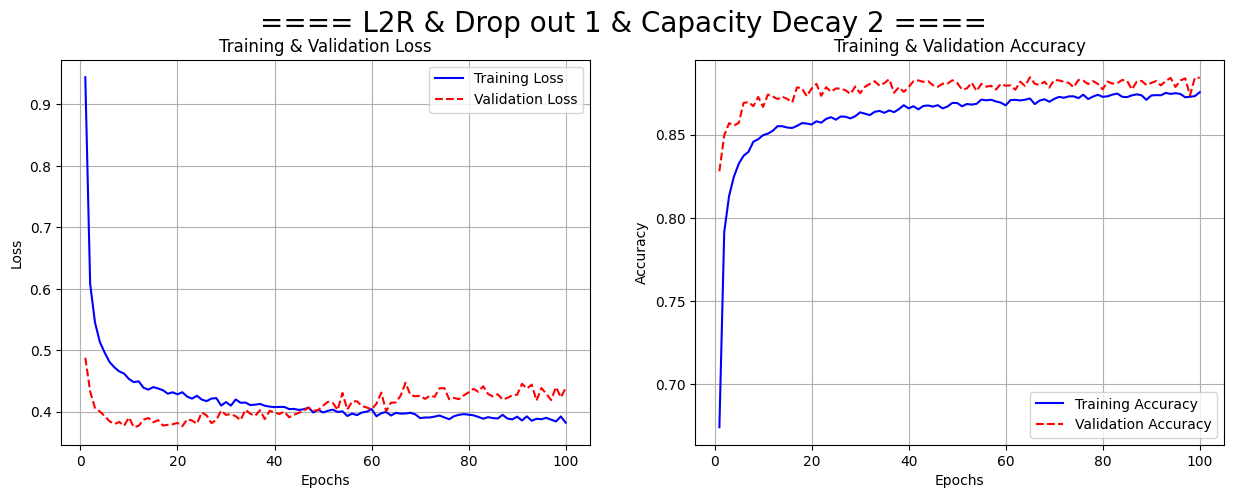

In [111]:
import matplotlib.pyplot as plt


history_model = Hist_fmnist_L2R_D1_C2

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2R & Drop out 1 & Capacity Decay 2 ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [115]:
loss, accuracy = fmnist_L2R_D1_C2.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.49429
Accuracy = 0.87070


## L2 R +Drop Out + Capacity Decay 3

In [96]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_D_C3 = models.Sequential()

fmnist_L2R_D_C3.add(layers.Dense(64, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_D_C3.add(layers.Dropout(0.4))

fmnist_L2R_D_C3.add(layers.Dense(32, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_D_C3.add(layers.Dropout(0.2))

fmnist_L2R_D_C3.add(layers.Dense(10, activation = 'softmax'))

fmnist_L2R_D_C3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 64)                50240     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_55 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [98]:
fmnist_L2R_D_C3.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_fmnist_L2R_D_C3 = fmnist_L2R_D_C3.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9203 - accuracy: 0.6766 - val_loss: 0.5109 - val_accuracy: 0.8194
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.7918 - val_loss: 0.4486 - val_accuracy: 0.8382
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8155 - val_loss: 0.4163 - val_accuracy: 0.8528
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4992 - accuracy: 0.8248 - val_loss: 0.4057 - val_accuracy: 0.8553
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4779 - accuracy: 0.8339 - val_loss: 0.3868 - val_accuracy: 0.8602
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.8370 - val_loss: 0.3870 - val_accuracy: 0.8593
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.8406 - val_loss: 0.3793 - val_accuracy: 0.8676

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8757 - val_loss: 0.3698 - val_accuracy: 0.8852
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3570 - accuracy: 0.8763 - val_loss: 0.3714 - val_accuracy: 0.8840
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.8764 - val_loss: 0.3693 - val_accuracy: 0.8863
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8748 - val_loss: 0.3796 - val_accuracy: 0.8794
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8776 - val_loss: 0.3771 - val_accuracy: 0.8797
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.8757 - val_loss: 0.3666 - val_accuracy: 0.8819
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3605 - accuracy: 0.8751 - val_loss: 0.3781 - val_accuracy:

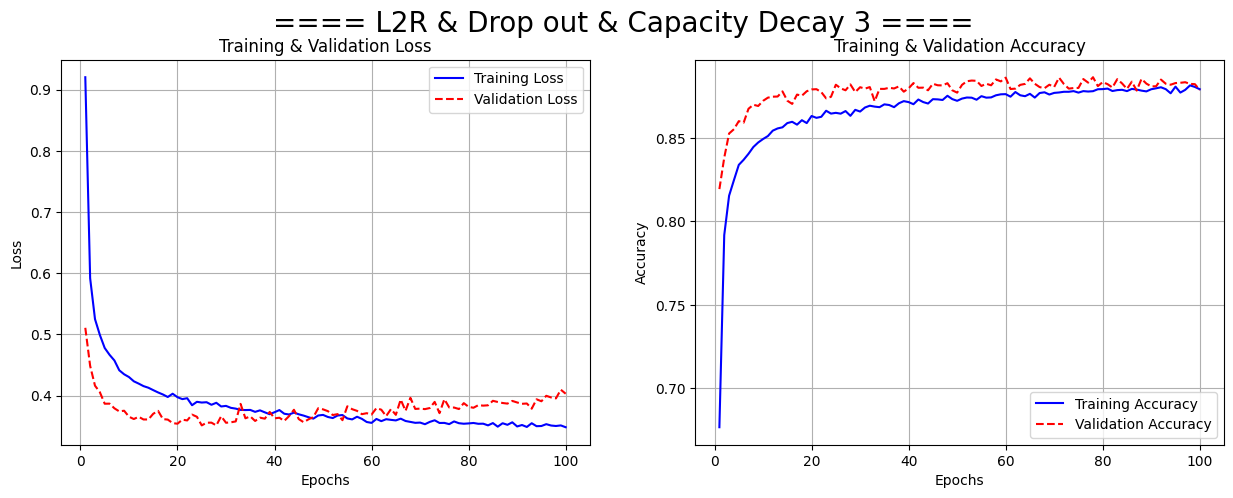

In [99]:
import matplotlib.pyplot as plt


history_model = Hist_fmnist_L2R_D_C3

epochs = range(1, 101)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2R & Drop out & Capacity Decay 3 ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [116]:
loss, accuracy = fmnist_L2R_D_C3.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.44871
Accuracy = 0.86750


## L2 R +Drop Out + Capacity Decay 3 + epoch Decay 1

In [118]:
from tensorflow.keras import models, layers, regularizers

fmnist_L2R_D_C3_E1 = models.Sequential()

fmnist_L2R_D_C3_E1.add(layers.Dense(64, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
fmnist_L2R_D_C3_E1.add(layers.Dropout(0.4))

fmnist_L2R_D_C3_E1.add(layers.Dense(32, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
fmnist_L2R_D_C3_E1.add(layers.Dropout(0.2))

fmnist_L2R_D_C3_E1.add(layers.Dense(10, activation = 'softmax'))

fmnist_L2R_D_C3_E1.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 64)                50240     
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [119]:
fmnist_L2R_D_C3_E1.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_fmnist_L2R_D_C3_E1 = fmnist_L2R_D_C3_E1.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.9148 - accuracy: 0.6813 - val_loss: 0.5305 - val_accuracy: 0.8138
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.6051 - accuracy: 0.7883 - val_loss: 0.4433 - val_accuracy: 0.8445
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.8121 - val_loss: 0.4244 - val_accuracy: 0.8501
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.8238 - val_loss: 0.4074 - val_accuracy: 0.8531
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.8318 - val_loss: 0.3993 - val_accuracy: 0.8563
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4705 - accuracy: 0.8371 - val_loss: 0.3860 - val_accuracy: 0.8637
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.8406 - val_loss: 0.3706 - val_accuracy: 0.8683
Epoch 

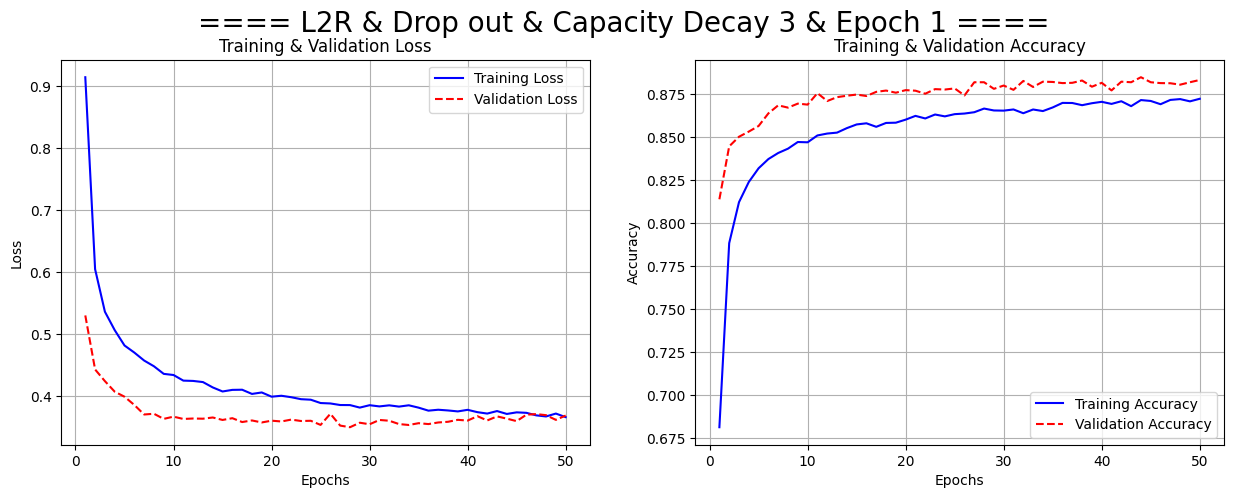

In [121]:
import matplotlib.pyplot as plt


history_model = Hist_fmnist_L2R_D_C3_E1

epochs = range(1, 51)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2R & Drop out & Capacity Decay 3 & Epoch 1 ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [122]:
loss, accuracy = fmnist_L2R_D_C3_E1.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.40550
Accuracy = 0.87570


In [ ]:
# 데이터 스플릿 시에 층화추출을 안했다...

In [126]:
from sklearn.model_selection import train_test_split 

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045, stratify = y_train)

X1_train.shape, y1_train.shape, X1_valid.shape, y1_valid.shape

((38400, 784), (38400, 10), (9600, 784), (9600, 10))

In [129]:
# 클래스별로 배분이 잘 됐는지 체크해보자


# print('Train_Data :','\n', (y1_train.value_counts() / y1_train.shape[0]) * 100)
# print('Test_Data :','\n', (y1_test.value_counts() / y1_test.shape[0]) * 100)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

# 
# 
# 
# The End
# 
# 
# 